In [32]:
import numpy as np 
from tools import bin_to_dec, dec_to_bin 

rng = np.random.default_rng(seed=123)

epochs = 10 

func = lambda x : x 

n =4 
m =4 
nint=0
mint =0

pn = n - nint 

x_min = 0
x_max = 2.**nint - 2.**(-pn)
x_arr = np.array(x_min + (x_max - x_min) *rng.random(size=epochs))
fx_arr = np.array([func(i) for i in x_arr])

x_arr_bin = [dec_to_bin(i,n,'unsigned mag',nint) for i in x_arr]
fx_arr_bin = [dec_to_bin(i,m,'unsigned mag',mint) for i in fx_arr]

z_arr = [dec_to_bin(i,n,encoding='unsigned mag') for i in range(2**n)]
z_arr = np.array([bin_to_dec(i,nint=nint,encoding='unsigned mag') for i in z_arr])

z_arr **3 


array([0.00000000e+00, 2.44140625e-04, 1.95312500e-03, 6.59179688e-03,
       1.56250000e-02, 3.05175781e-02, 5.27343750e-02, 8.37402344e-02,
       1.25000000e-01, 1.77978516e-01, 2.44140625e-01, 3.24951172e-01,
       4.21875000e-01, 5.36376953e-01, 6.69921875e-01, 8.23974609e-01])

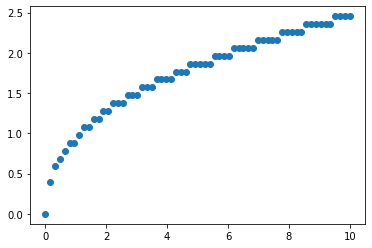

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
from tools import bin_to_dec, dec_to_bin 

f = lambda x: x**(0.4) 
reduce=True

n = 6
m = 6 

x = np.linspace(0,10,2**n)
y = f(x) if reduce==False else 2*np.pi * np.array([bin_to_dec(j,nint=0,encoding="unsigned mag") for j in [dec_to_bin(np.modf(i/ (2*np.pi))[0],n=m,nint=0, encoding="unsigned mag") for i in f(x)] ])

plt.scatter(x,y)
plt.show()

In [20]:
2**(-4)

0.0625